In [10]:
import pandas as pd
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data.csv')

In [3]:
df.sample(5)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
40,41,Male,31,Doctor,7.7,7,75,6,Normal,120/80,70,8000,None
52,53,Male,32,Doctor,6.0,6,30,8,Normal,125/80,72,5000,None
345,346,Female,57,Nurse,8.2,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
241,242,Male,44,Salesperson,6.3,6,45,7,Overweight,130/85,72,6000,Insomnia
361,362,Female,59,Nurse,8.2,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [4]:
df.columns

Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [7]:
df['Sleep Disorder'] = df['Sleep Disorder'].fillna('None')
df.sample(5)


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
246,247,Male,44,Salesperson,6.3,6,45,7,Overweight,130/85,72,6000,Insomnia
33,34,Male,31,Doctor,6.1,6,30,8,Normal,125/80,72,5000,None
365,366,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
292,293,Female,50,Nurse,6.1,6,90,8,Overweight,140/95,75,10000,Sleep Apnea
160,161,Male,39,Lawyer,7.2,8,60,5,Normal,130/85,68,8000,None


In [8]:
df.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


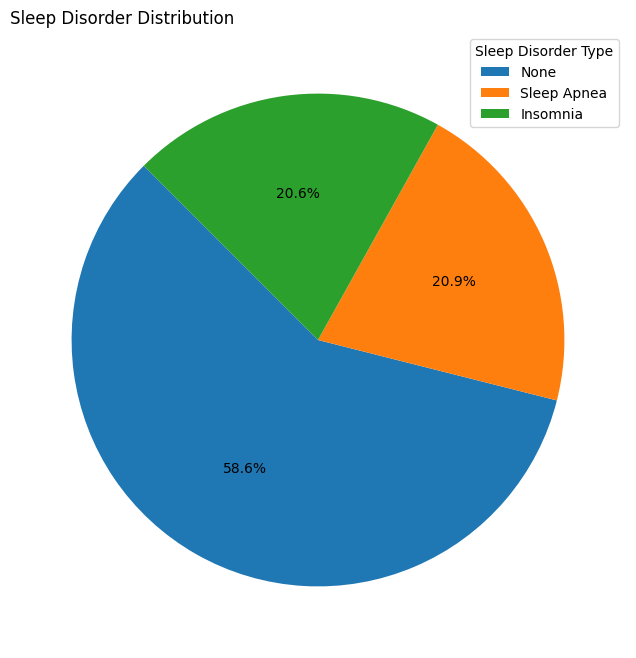

In [11]:
sleep_count = df['Sleep Disorder'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(sleep_count, autopct='%1.1f%%', startangle=135)
plt.title("Sleep Disorder Distribution", loc='left')
plt.legend(labels=sleep_count.index, title="Sleep Disorder Type", loc="upper right")
plt.show()

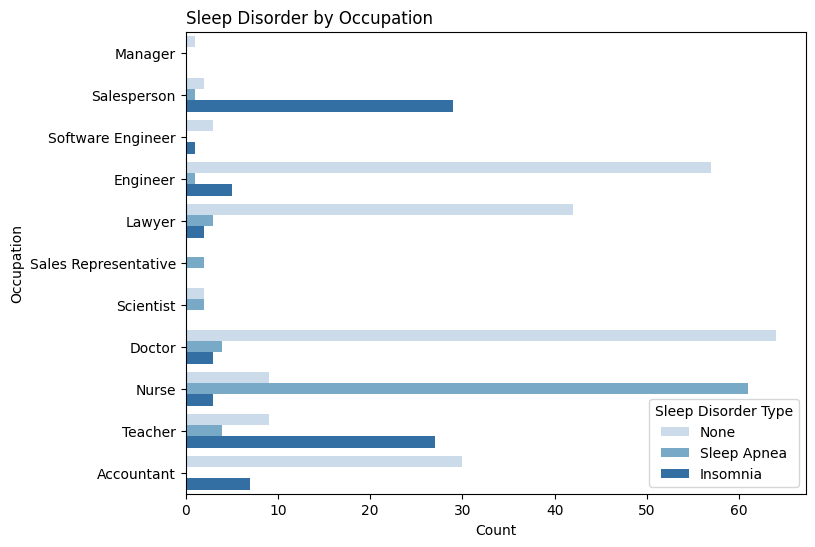

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

sleep_occupation = df.groupby(['Sleep Disorder', 'Occupation']).size().reset_index(name='Count')
sleep_occupation = sleep_occupation.sort_values(by='Count', ascending=True)

plt.figure(figsize=(8, 6))
sns.barplot(x='Count',
            y='Occupation',
            hue='Sleep Disorder',
            data=sleep_occupation,
            palette='Blues') 

plt.xlabel('Count')
plt.ylabel('Occupation')
plt.title('Sleep Disorder by Occupation', loc='left')
plt.legend(title='Sleep Disorder Type')

plt.show()

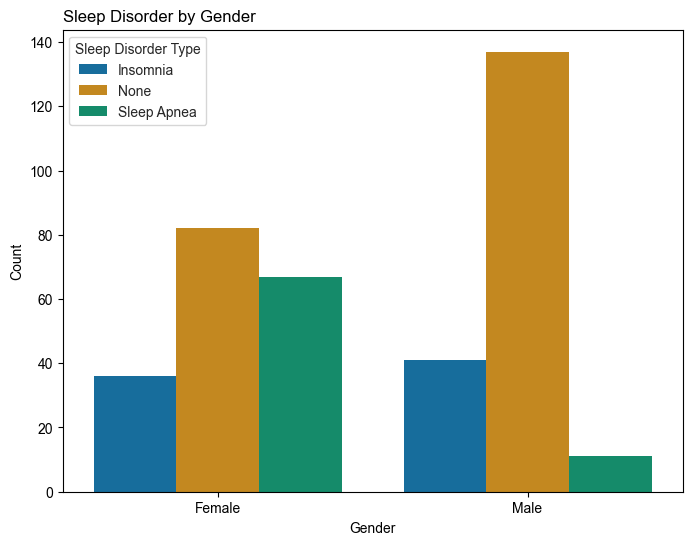

In [28]:
sleep_gender = df.groupby(['Sleep Disorder', 'Gender']).size().reset_index(name='count')

plt.figure(figsize=(8, 6))
sns.barplot(x='Gender',
            y='count',
            hue='Sleep Disorder',
            data=sleep_gender,
            palette='colorblind')  
sns.set_style('ticks')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Sleep Disorder by Gender', loc='left')
plt.legend(title='Sleep Disorder Type')

plt.show()

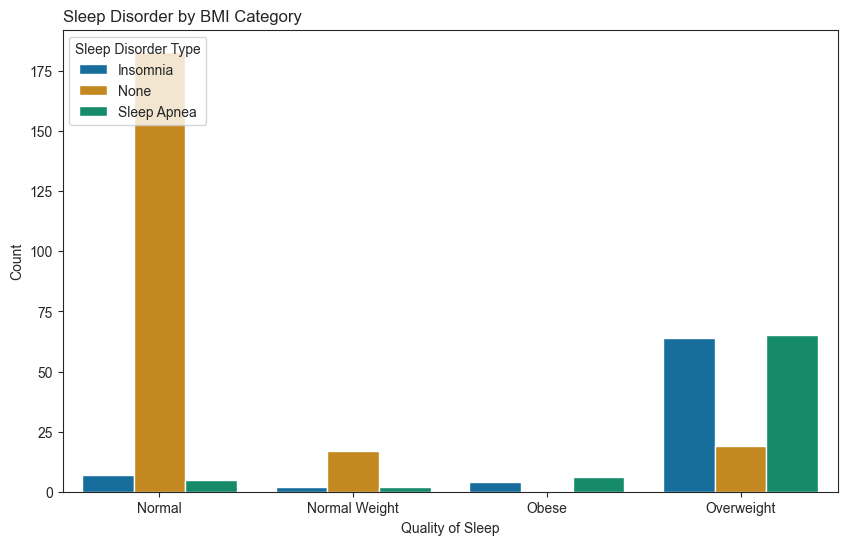

In [33]:
sleep_bmi = df.groupby(['Sleep Disorder', 'BMI Category']).size().reset_index(name='count')

plt.figure(figsize=(10, 6))
sns.barplot(x='BMI Category',
            y='count',
            hue='Sleep Disorder',
            data=sleep_bmi,
            palette='colorblind')  # Fixed the error by passing a valid palette name 'colorblind' instead of the undefined variable color

plt.xlabel('Quality of Sleep')
plt.ylabel('Count')
plt.title('Sleep Disorder by BMI Category', loc='left')
plt.legend(title='Sleep Disorder Type', loc='upper left')

plt.show()